In [2]:
import os, sys
import pandas as pd
import numpy as np
import glob
import math
import collections
import tqdm

import matplotlib
import matplotlib.pyplot as plt


%matplotlib inline

import seaborn as sns

sns.set(style="whitegrid")
sns.set_context("talk")



In [3]:
import pickle
from sklearn import manifold
from time import time

records_meta = pickle.load(open('/Users/nanwu/Desktop/2020Fallcourses/contexual_purs/logs/logs/metabeer_50/0_representations/records.pkl' , 'rb'))
records_baseline = pickle.load(open('/Users/nanwu/Desktop/2020Fallcourses/contexual_purs/logs/beer_baseline/8_representations/records.pkl' , 'rb'))

In [104]:
data_ori = pd.read_csv('../data/beer/test.csv', index_col=0)
data_ori = data_ori.drop(['review_time', 'review_overall', 
                          'review_aroma', 'review_appearance', 
                          'review_profilename', 'review_palate', 'review_taste', 
                          ], axis=1)

data_ori = data_ori.drop_duplicates()
data_ori = data_ori.set_index('beer_beerid')

In [5]:
records = records_baseline

repres = np.array(records['item_embedding'])
users = np.array(records['user'])
user_pres = []
for i in np.unique(users):
    user_pres.append(np.mean(repres[np.where(users==i)[0]], 0))

items = np.array(records_meta['item'])
item_pres = []
for i in np.unique(items):
    item_pres.append(np.mean(repres[np.where(items==i)[0]], 0))


# (fig, subplots) = plt.subplots(1, 3, figsize=(20, 5))
# perplexities = [3, 10, 20,]

# for i, perplexity in enumerate(perplexities):
    
#     t0 = time()
#     tsne = manifold.TSNE(n_components=2, init='random', verbose=1, #n_iter=250,
#                      random_state=0, perplexity=perplexity)

#     transformed_repr = tsne.fit_transform(np.array(user_pres[:1000]).T)
#     t1 = time()

#     #print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
#     subplots[i].set_title("Perplexity=%d" % perplexity)
#     subplots[i].scatter(transformed_repr, transformed_repr, 
#                #c="r"
#               )
#     # ax.scatter(Y[green, 0], Y[green, 1], c="g")
# #     subplots[i].xaxis.set_major_formatter(NullFormatter())
# #     subplots[i].yaxis.set_major_formatter(NullFormatter())
#     subplots[i].axis('tight')

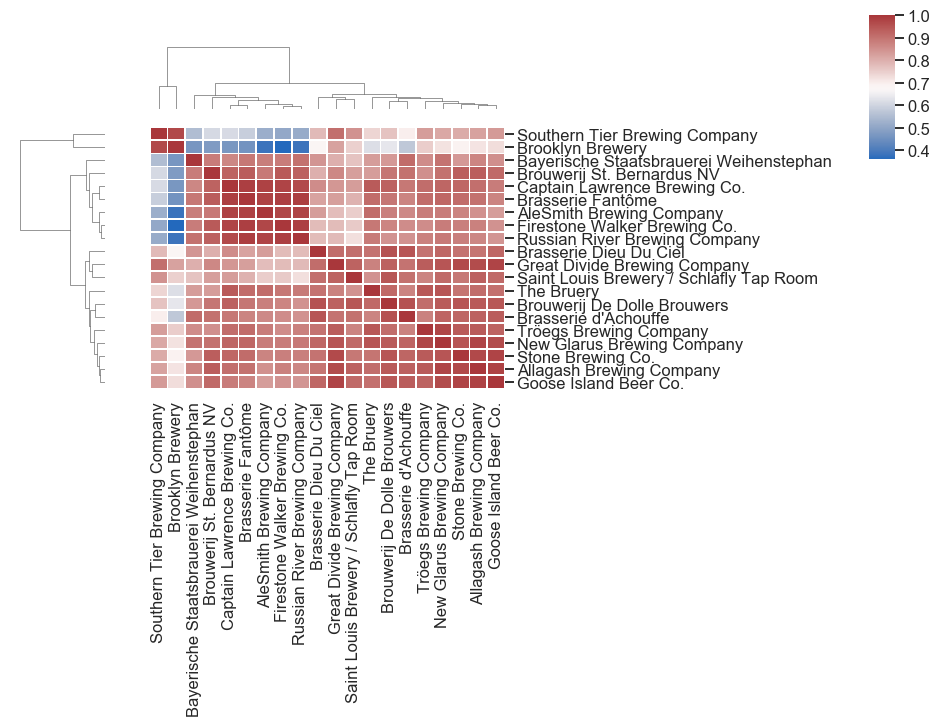

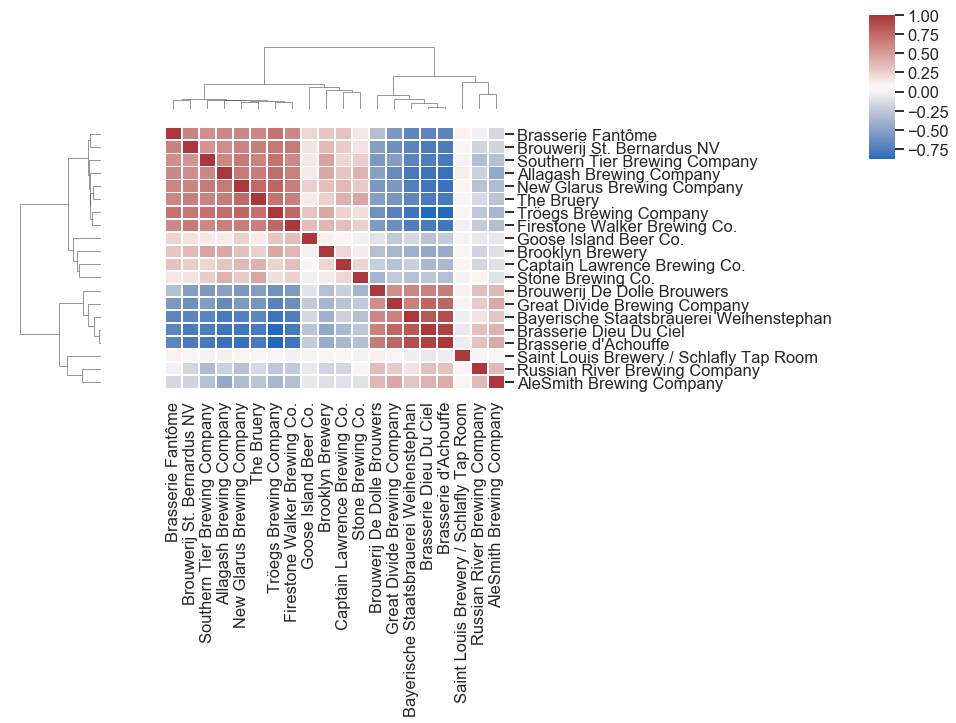

In [64]:
def plotting_cluster(records, length = 20):
    repres = np.array(records['item_embedding'])
    items = np.array(records_meta['item'])
    

    brewery_pres = []
    for i in data_ori['brewery_id'].unique()[:length]:
        item_pres = []
        for j in data_ori[data_ori['brewery_id']== i].index:
            item_pres.append(np.mean(repres[np.where(items==j)[0]], 0))
        brewery_pres.append(np.mean(item_pres, 0))
        
    names = data_ori.groupby(['brewery_id'])['brewery_name'].unique()

    list_name = []
    for i in data_ori['brewery_id'].unique()[:length]:
        list_name.append(names.loc[i][0])

    data_corr = pd.DataFrame(dict(zip(list_name, np.corrcoef(brewery_pres[:length])) ))
    data_corr.index = list_name
    g = sns.clustermap(data_corr, #center=0, 
                       cmap="vlag",
                       #dendrogram_ratio=(.1, .2),
                       cbar_pos=(1.02, 0.5, .03, .2), #(left, bottom, width, height),
                       linewidths=.75, 
                      figsize=(12, 10), 
                       #kwargs={'xticklabels':0}
                      )

plotting_cluster(records_meta, 20)
plotting_cluster(records_baseline, 20)

In [80]:
from sklearn.datasets import fetch_mldata
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


# get mnist data
X = np.array(brewery_pres)
y = list_name
# first reduce dimensionality before feeding to t-sne
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X) 


# # randomly sample data to run quickly
# rows = np.arange(70000)
# np.random.shuffle(rows)
# n_select = 10000 

# reduce dimensionality with t-sne
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200,)
tsne_results = tsne.fit_transform(X_pca)#X_pca[rows[:n_select],:])
# visualize


4453
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 4453 samples in 0.005s...
[t-SNE] Computed neighbors for 4453 samples in 1.394s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4453
[t-SNE] Computed conditional probabilities for sample 2000 / 4453
[t-SNE] Computed conditional probabilities for sample 3000 / 4453
[t-SNE] Computed conditional probabilities for sample 4000 / 4453
[t-SNE] Computed conditional probabilities for sample 4453 / 4453
[t-SNE] Mean sigma: 0.008479
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.603287
[t-SNE] Error after 1000 iterations: 2.169416


In [101]:
records = records_meta

repres = np.array(records['item_embedding'])

items = np.array(records_meta['item'])

brewery_pres = []
for i in data_ori['brewery_id'].unique():
    item_pres = []
    for j in data_ori[data_ori['brewery_id']== i].index:
        item_pres.append(np.mean(repres[np.where(items==j)[0]], 0))
    brewery_pres.append(np.mean(item_pres, 0))

print(len(brewery_pres))

# get mnist data
X = np.array(brewery_pres)
# y = list_name
# first reduce dimensionality before feeding to t-sne
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X) 

# reduce dimensionality with t-sne
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200,)
tsne_results_meta = tsne.fit_transform(X_pca)#X_pca[rows[:n_select],:])
# visualize

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 4453 samples in 0.007s...
[t-SNE] Computed neighbors for 4453 samples in 0.844s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4453
[t-SNE] Computed conditional probabilities for sample 2000 / 4453
[t-SNE] Computed conditional probabilities for sample 3000 / 4453
[t-SNE] Computed conditional probabilities for sample 4000 / 4453
[t-SNE] Computed conditional probabilities for sample 4453 / 4453
[t-SNE] Mean sigma: 0.052734
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.265465
[t-SNE] Error after 1000 iterations: 1.093678


In [98]:
# df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
# df_tsne_meta = pd.DataFrame(tsne_results_meta, columns=['comp1', 'comp2'])

# df_tsne['review_aroma'] = data_ori.groupby(['brewery_id'])['review_aroma'].mean()
# sns.lmplot(x='comp1', y='comp2', data=df_tsne, height=8, aspect=1, #hue='label', 
#            fit_reg=False)


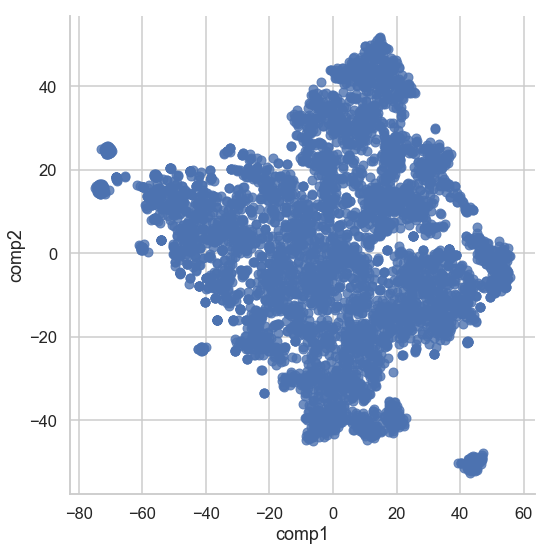

In [96]:
df_tsne_meta = pd.DataFrame(tsne_results_meta, columns=['comp1', 'comp2'])
sns.lmplot(x='comp1', y='comp2', data=df_tsne_meta, height=8, aspect=1,
           #hue='label', 
           fit_reg=False)


In [108]:
def plotting_tsne(X_brewery_pres_pca, X_brewery_pres_meta_pca, list_prep):


    for p in list_prep:
        print(p)
        tsne = TSNE(n_components=2, verbose=1, perplexity=p, n_iter=1000, learning_rate=200,)
        tsne_results = tsne.fit_transform(X_brewery_pres_pca)#X_pca[rows[:n_select],:])
        tsne_results_meta = tsne.fit_transform(X_brewery_pres_meta_pca)

        df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
        df_tsne['model'] = 'vanilla'
        
        df_tsne_meta = pd.DataFrame(tsne_results_meta, columns=['comp1', 'comp2'])
        df_tsne_meta['model'] = 'contextual'

        sns.lmplot(x='comp1', y='comp2', 
               data=pd.concat([df_tsne_meta, df_tsne]), height=8, aspect=1, col='model', 
               fit_reg=False)
        
        plt.show()
    
    

In [105]:

repres = np.array(records_meta['item_embedding'])
items = np.array(records_meta['item'])

brewery_pres = []
for i in data_ori['brewery_id'].unique():
    item_pres = []
    for j in data_ori[data_ori['brewery_id']== i].index:
        item_pres.append(np.mean(repres[np.where(items==j)[0]], 0))
    brewery_pres.append(np.mean(item_pres, 0))

print(len(brewery_pres))

# get mnist data
X = np.array(brewery_pres)
pca = PCA(n_components=50)
X_pca_meta = pca.fit_transform(X) 

4453


In [106]:
repres = np.array(records_baseline['item_embedding'])
items = np.array(records_baseline['item'])

brewery_pres = []
for i in data_ori['brewery_id'].unique():
    item_pres = []
    for j in data_ori[data_ori['brewery_id']== i].index:
        item_pres.append(np.mean(repres[np.where(items==j)[0]], 0))
    brewery_pres.append(np.mean(item_pres, 0))

print(len(brewery_pres))

# get mnist data
X = np.array(brewery_pres)
pca = PCA(n_components=50)
X_pca_baseline = pca.fit_transform(X) 

4453


5
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 4453 samples in 0.007s...
[t-SNE] Computed neighbors for 4453 samples in 1.382s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4453
[t-SNE] Computed conditional probabilities for sample 2000 / 4453
[t-SNE] Computed conditional probabilities for sample 3000 / 4453
[t-SNE] Computed conditional probabilities for sample 4000 / 4453
[t-SNE] Computed conditional probabilities for sample 4453 / 4453
[t-SNE] Mean sigma: 0.003978
[t-SNE] KL divergence after 250 iterations with early exaggeration: 100.734940
[t-SNE] Error after 1000 iterations: 2.267878
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 4453 samples in 0.005s...
[t-SNE] Computed neighbors for 4453 samples in 0.320s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4453
[t-SNE] Computed conditional probabilities for sample 2000 / 4453
[t-SNE] Computed conditional probabilities for sample 3000 / 4453
[t-SNE] Computed conditional proba

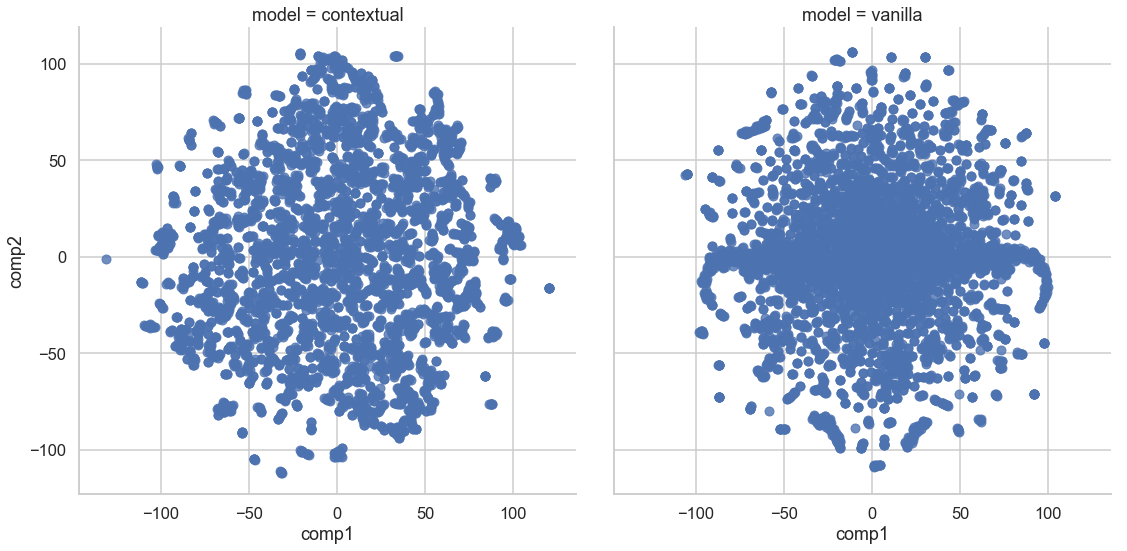

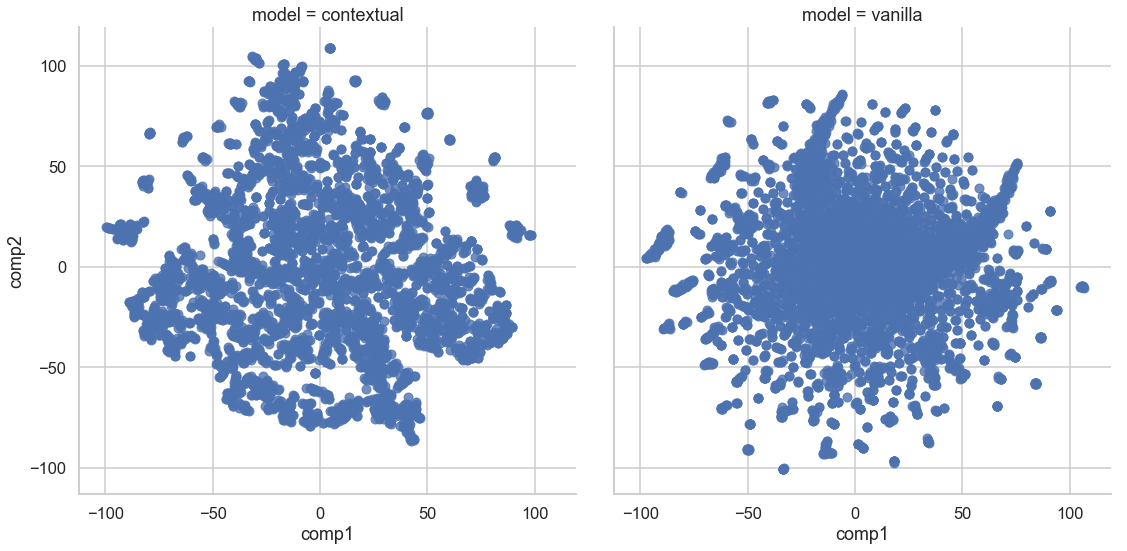

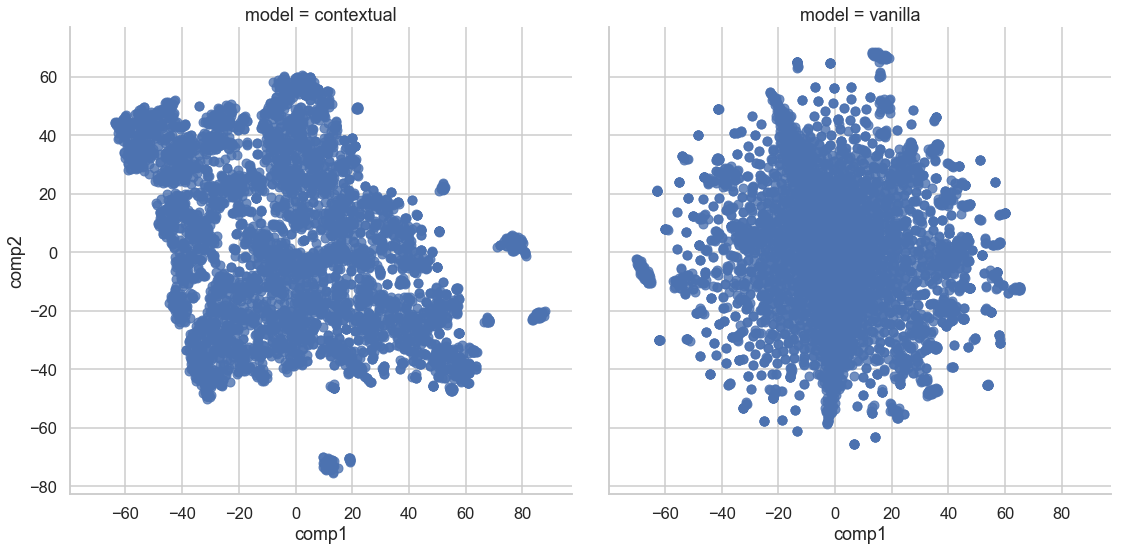

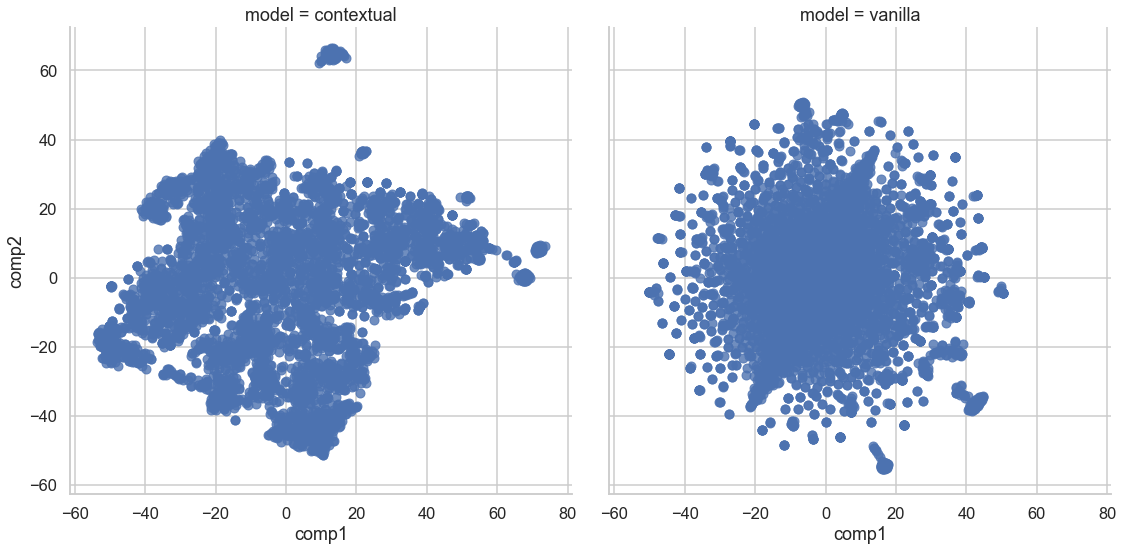

In [107]:
plotting_tsne(X_pca_baseline, X_pca_meta, [5, 10, 30, 50])

5
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.005s...
[t-SNE] Computed neighbors for 4000 samples in 1.010s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 0.024244
[t-SNE] KL divergence after 250 iterations with early exaggeration: 104.304741
[t-SNE] Error after 1000 iterations: 1.918651
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.004s...
[t-SNE] Computed neighbors for 4000 samples in 0.426s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 0.055596
[t-SN

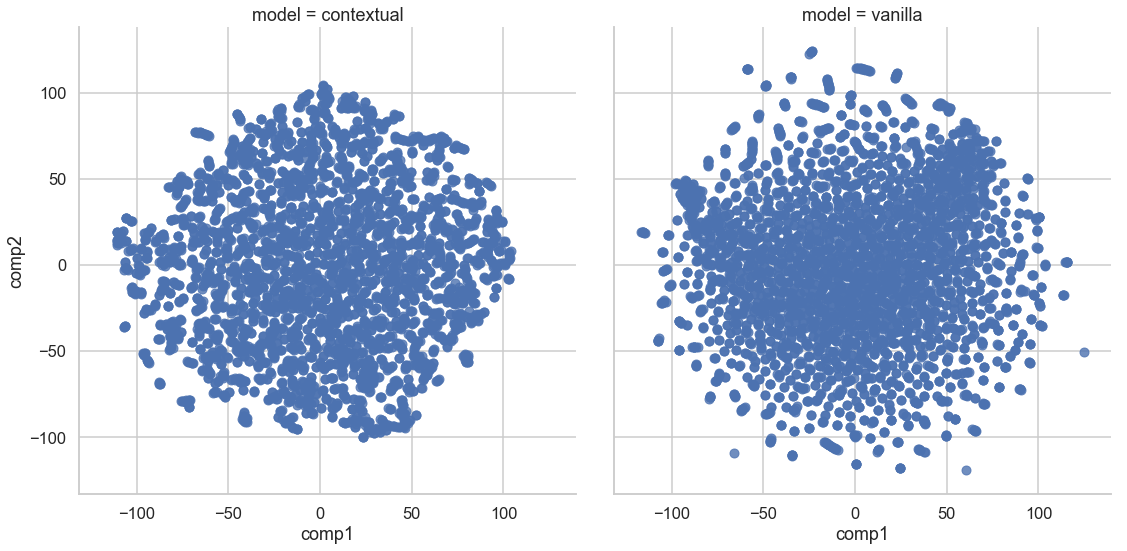

10
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.005s...
[t-SNE] Computed neighbors for 4000 samples in 0.964s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 0.032651
[t-SNE] KL divergence after 250 iterations with early exaggeration: 97.829689
[t-SNE] Error after 1000 iterations: 2.274025
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.004s...
[t-SNE] Computed neighbors for 4000 samples in 0.484s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 0.067256
[t-SN

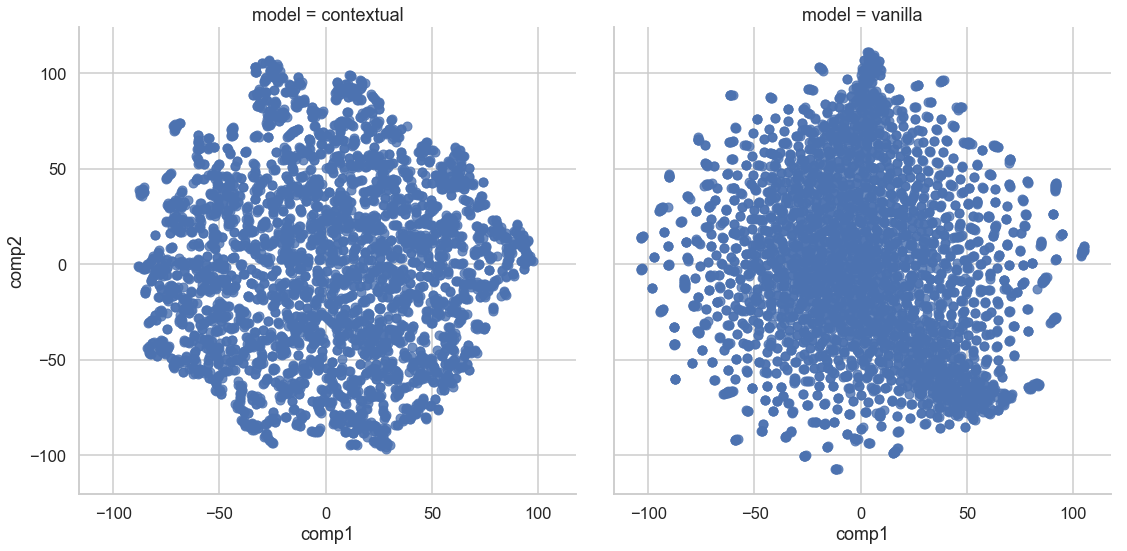

30
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.005s...
[t-SNE] Computed neighbors for 4000 samples in 1.114s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 0.038402
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.399513
[t-SNE] Error after 1000 iterations: 2.436934
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.006s...
[t-SNE] Computed neighbors for 4000 samples in 0.646s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 0.083744
[t-SN

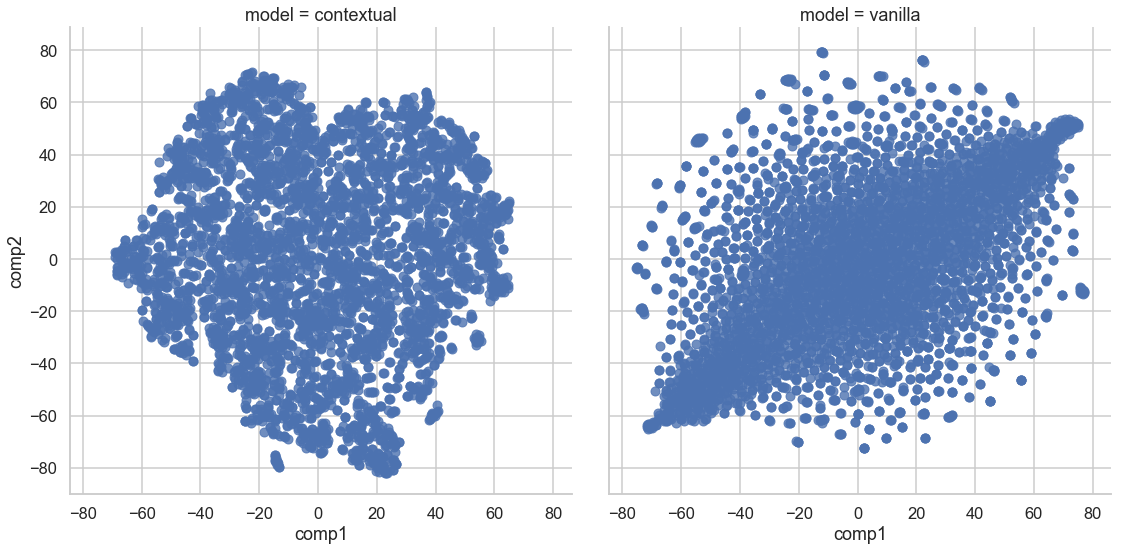

50
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.005s...
[t-SNE] Computed neighbors for 4000 samples in 1.124s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 0.040352
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.237831
[t-SNE] Error after 1000 iterations: 2.375763
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.004s...
[t-SNE] Computed neighbors for 4000 samples in 0.706s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4000
[t-SNE] Computed conditional probabilities for sample 2000 / 4000
[t-SNE] Computed conditional probabilities for sample 3000 / 4000
[t-SNE] Computed conditional probabilities for sample 4000 / 4000
[t-SNE] Mean sigma: 0.091793
[t-

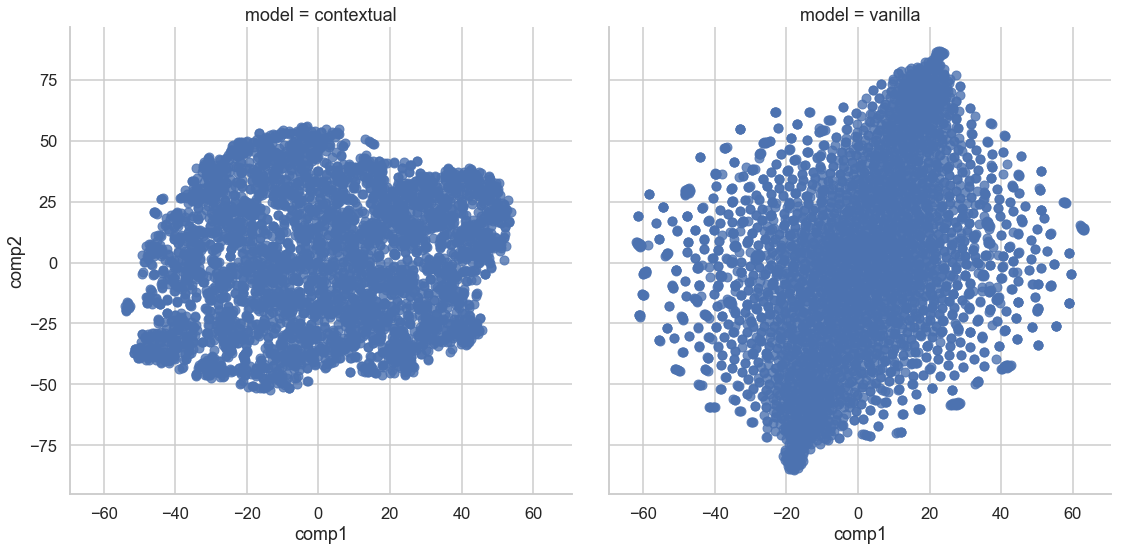

In [110]:
rows = np.arange(len(repres))
np.random.shuffle(rows)
n_select = 4000 
pca = PCA(n_components=50)

repres = np.array(records_meta['item_embedding'])

# get mnist data
X = np.array(repres)
X_pca_meta = pca.fit_transform(X[rows[:n_select],:])

#################################################################

repres = np.array(records_baseline['item_embedding'])
X = np.array(repres)
X_pca_baseline = pca.fit_transform(X[rows[:n_select],:])


plotting_tsne(X_pca_baseline, X_pca_meta, [5, 10, 30, 50])